In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, TSNE
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
X = np.array(pd.read_csv('/home/senanayaked/data/2D3C_RAW.csv', header=None))#np.random.randn(1000,5)
X.shape

(1500, 2)

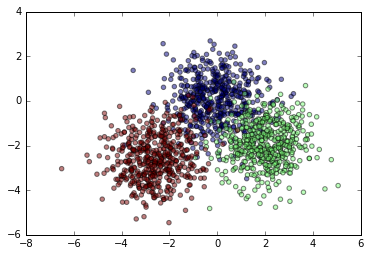

In [31]:
plt.scatter(X.T[0], X.T[1], alpha = 0.5,c = np.array(range(1500))/500)
plt.show()

In [32]:
# plt.scatter(Y.T[0], Y.T[1], alpha=0.5)
# plt.show()

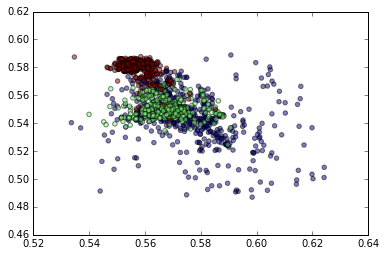

In [39]:
Y = np.random.random((X.shape[0], 2))

for j in range(1000):
    nbrs = NearestNeighbors(n_neighbors=150).fit(X)
    Ds, Neis = nbrs.kneighbors(X)
    for i, x, D, neis in zip(range(Y.shape[0]),X, Ds, Neis):
        
        y_neis = Y[neis]
        
        d = np.linalg.norm(y_neis - Y[i], axis = 1)
        D /= D.sum()
        d /= d.sum()
        d += 0.0001
        Y[neis] = Y[i]+ np.array([(D)/d]).T * (Y[neis]-Y[i])
        
        if np.isnan(Y).any():
            print i, Y
            br = True
            break
    if br:
        break
plt.scatter(Y.T[0], Y.T[1], alpha=0.5, c = np.array(range(1500))/500)
plt.show()

In [34]:
Y = TSNE().fit_transform(X)

In [50]:
plt.scatter(Y.T[0], Y.T[1], alpha=0.5, c = np.array(range(1500))/500)
plt.show()

In [12]:
np.array([(D-1)/d]).T

array([[       -inf],
       [-1.04860687],
       [-0.87292792],
       [-1.40181088],
       [-1.03675744],
       [-0.83042019],
       [-0.8505676 ],
       [-0.91957515],
       [-0.16011984],
       [ 0.        ]])

In [13]:
d

array([ 0.        ,  0.75983192,  0.73537068,  0.44734986,  0.58698365,
        0.45313639,  0.2601286 ,  0.20248423,  1.        ,  0.15534189])